# 911 Calls Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

** What are the top 5 townships for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

** How many unique title codes are there? **

In [8]:
df['title'].value_counts().count()

133

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.**

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [10]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts()

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

** Countplot of 911 calls by Reason. **

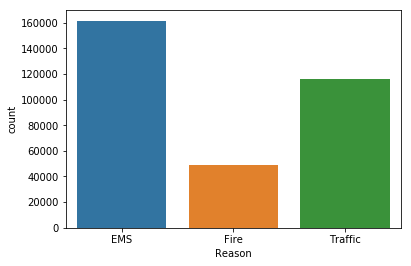

In [12]:
sns.countplot(x='Reason',data=df)

In [13]:
df['timeStamp'].dtypes

dtype('O')

In [14]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [17]:
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

** Countplot of the Day of Week column with the Reason column. **

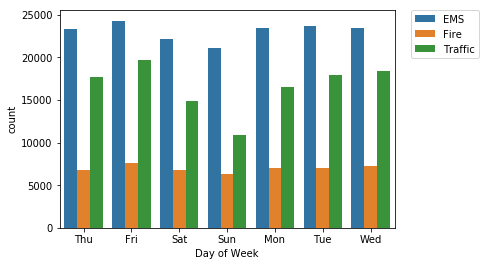

In [18]:
sns.countplot(x='Day of Week',hue='Reason', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

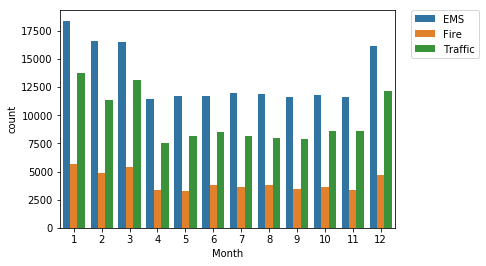

In [19]:
sns.countplot(x='Month',hue='Reason', data = df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093


** Plot shows the count of 911 calls per month. **

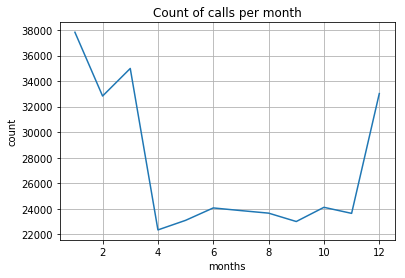

In [21]:
fig, ax = plt.subplots()
ax.plot(byMonth.index, byMonth['Reason'])
ax.set(xlabel='months', ylabel='count',
       title='Count of calls per month')
ax.grid()

** A linear fit on the number of 911 calls per month. **

In [22]:
byMonth.reset_index(inplace=True)

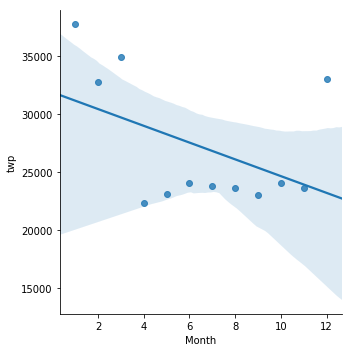

In [23]:
sns.lmplot(x='Month',y='twp',data=byMonth,markers='o')

In [24]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

** A plot of counts of 911 calls.**

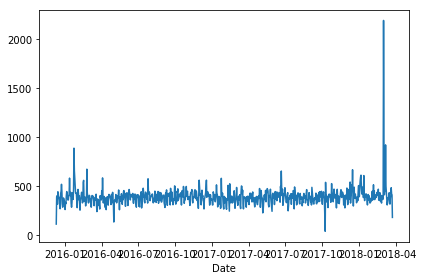

In [25]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Each plot representing a Reason for the 911 call and the amount of them done each day**

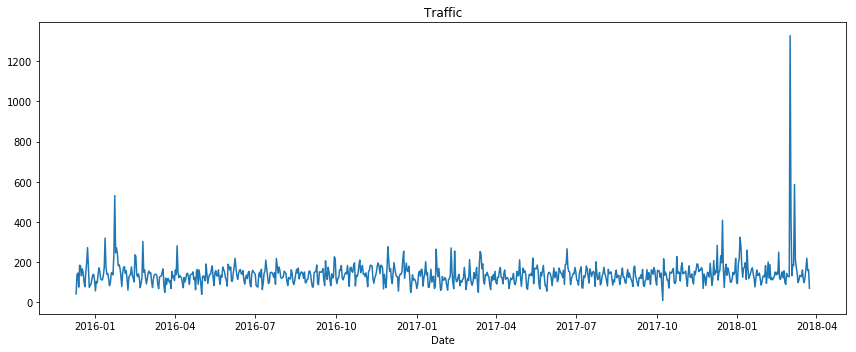

In [26]:
plt.figure(figsize=(12,5))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

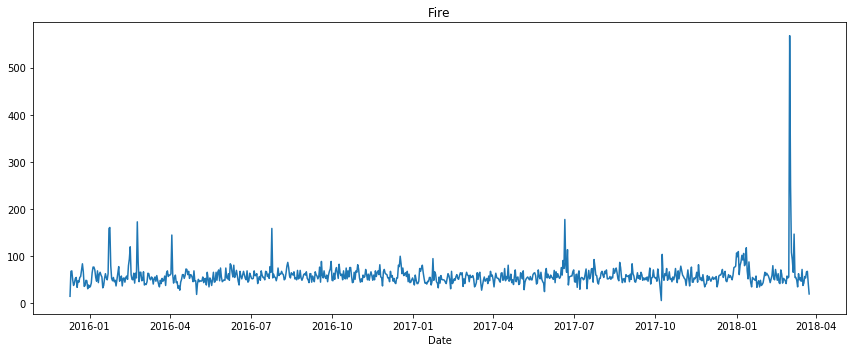

In [27]:
plt.figure(figsize=(12,5))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

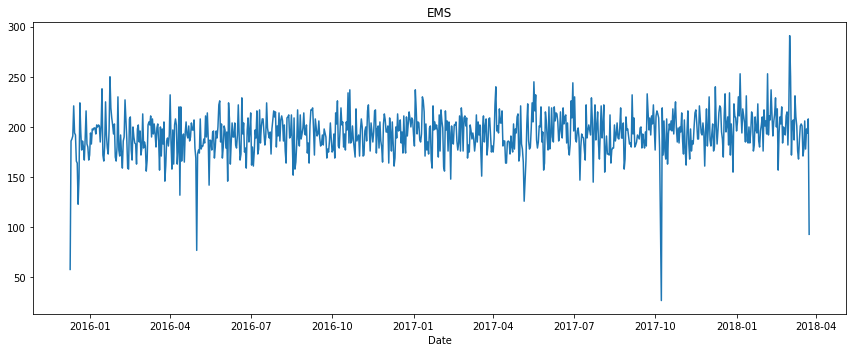

In [28]:
plt.figure(figsize=(12,5))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

** Each map representing the amount of the 911 calls done every day in particular hours **

In [29]:
df1 = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
df1.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
Mon,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
Sat,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
Sun,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177
Thu,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120


Text(0.5,1,'Count of Calls in particular day and hour')

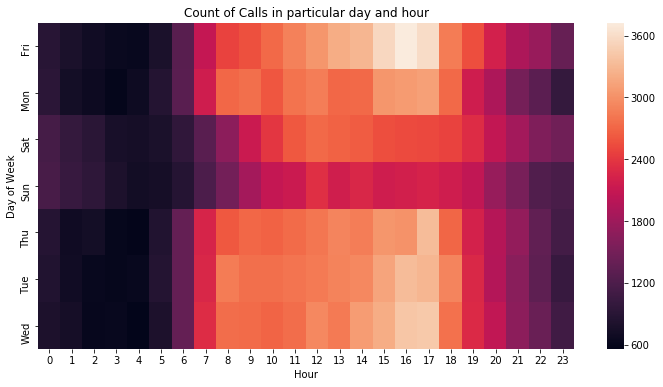

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df1)
plt.title('Count of Calls in particular day and hour')

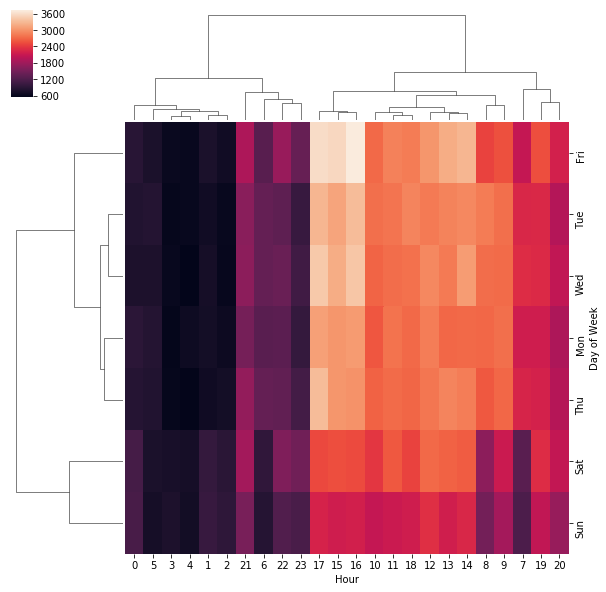

In [31]:
sns.clustermap(df1)

** Each map representing the amount of the 911 calls done every day in particular months **

In [32]:
df2 = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
df2.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570
Mon,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
Sat,5103,4431,4355,3490,2764,3024,3515,2810,3144,3042,2972,5200
Sun,4882,3806,3268,3026,2580,2679,3259,2658,2565,3172,2592,3896
Thu,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899


Text(0.5,1,'Count of 911 Calls in particular day and month')

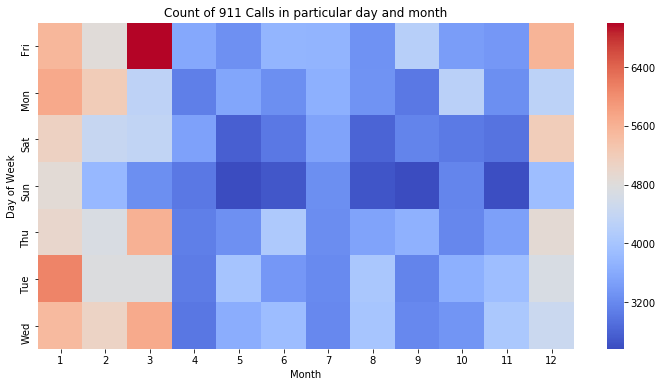

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df2,cmap='coolwarm')
plt.title('Count of 911 Calls in particular day and month')

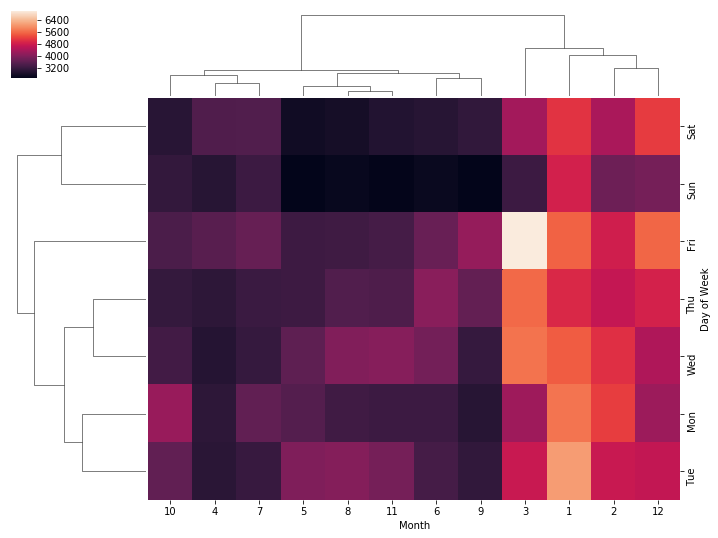

In [34]:
sns.clustermap(df2,figsize=(12,9))

** Each map representing the amount of the 911 calls done every day in particular Township **

In [35]:
df3 = df.groupby(by=['twp','Day of Week']).count()['Reason'].unstack()
df3.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
twp,,,,,,,
ABINGTON,3254,2942,2581,2257,2878,3119,3175
AMBLER,308,304,317,269,278,309,300
BERKS COUNTY,118,119,135,115,126,144,123
BRIDGEPORT,274,273,221,208,236,266,267
BRYN ATHYN,103,80,93,62,93,84,114


Text(0.5,1,'Count of 911 Calls in particular day in every township')

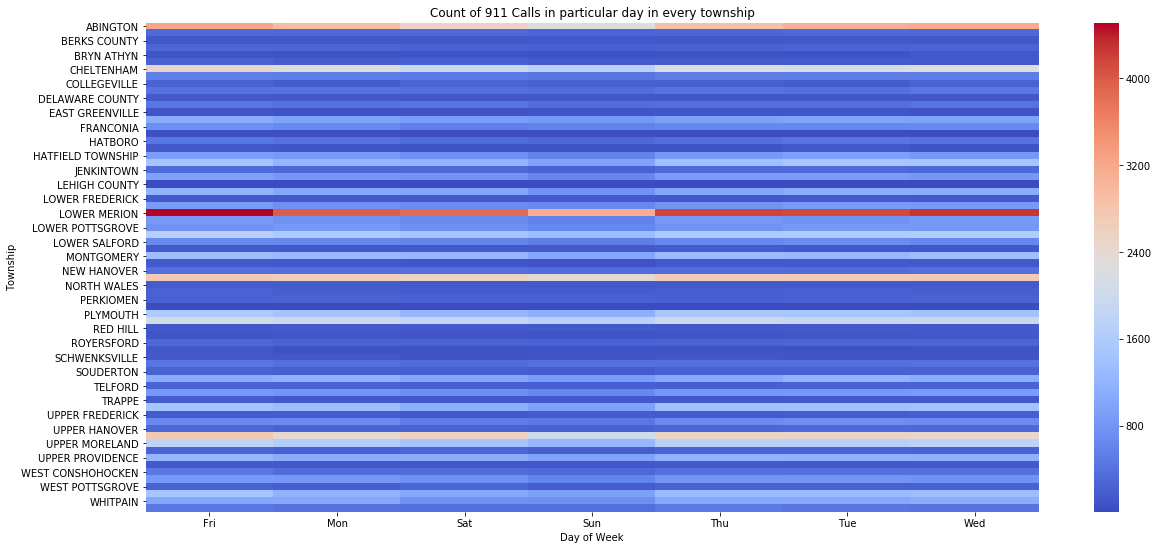

In [39]:
plt.figure(figsize=(20,9))
sns.heatmap(df3,cmap='coolwarm')
plt.ylabel("Township")
plt.title('Count of 911 Calls in particular day in every township')

Text(243.289,0.5,'Township')

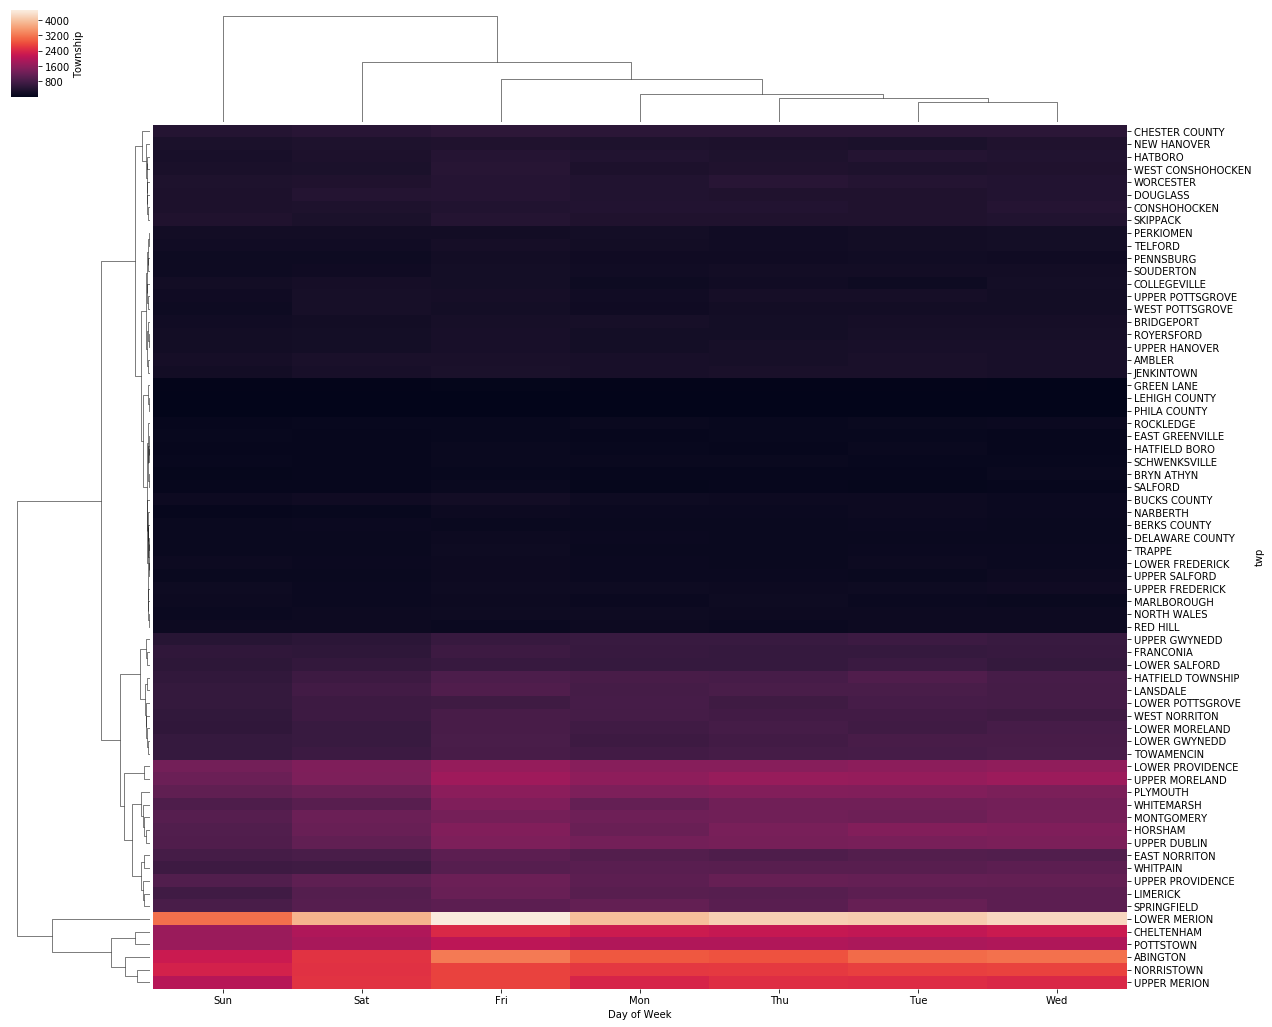

In [42]:
sns.clustermap(df3,figsize=(20,18))
plt.ylabel('Township')

** Each plot representing the amount of the 911 calls with Reason EMS done in time in particular townships **

In [75]:
df4 = df[df['Reason']=='EMS'].groupby(by=['Date','twp']).count()['Reason'].unstack()

In [76]:
df4.head()

twp,ABINGTON,AMBLER,BERKS COUNTY,BRIDGEPORT,BRYN ATHYN,BUCKS COUNTY,CHELTENHAM,CHESTER COUNTY,COLLEGEVILLE,CONSHOHOCKEN,...,UPPER MORELAND,UPPER POTTSGROVE,UPPER PROVIDENCE,UPPER SALFORD,WEST CONSHOHOCKEN,WEST NORRITON,WEST POTTSGROVE,WHITEMARSH,WHITPAIN,WORCESTER
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,NaN,1.0,NaN,1.0,NaN,NaN,1.0,2.0,NaN,NaN,...,3.0,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0,NaN
2015-12-11,10.0,2.0,NaN,1.0,1.0,1.0,9.0,3.0,2.0,3.0,...,4.0,NaN,3.0,1.0,NaN,2.0,NaN,2.0,6.0,NaN
2015-12-12,11.0,1.0,NaN,NaN,NaN,1.0,10.0,1.0,1.0,3.0,...,6.0,NaN,4.0,NaN,2.0,3.0,NaN,6.0,2.0,1.0
2015-12-13,16.0,2.0,1.0,NaN,1.0,NaN,6.0,1.0,NaN,3.0,...,7.0,1.0,1.0,2.0,NaN,2.0,1.0,4.0,2.0,2.0
2015-12-14,15.0,1.0,NaN,NaN,1.0,2.0,6.0,2.0,NaN,1.0,...,8.0,2.0,5.0,NaN,2.0,1.0,NaN,7.0,6.0,NaN


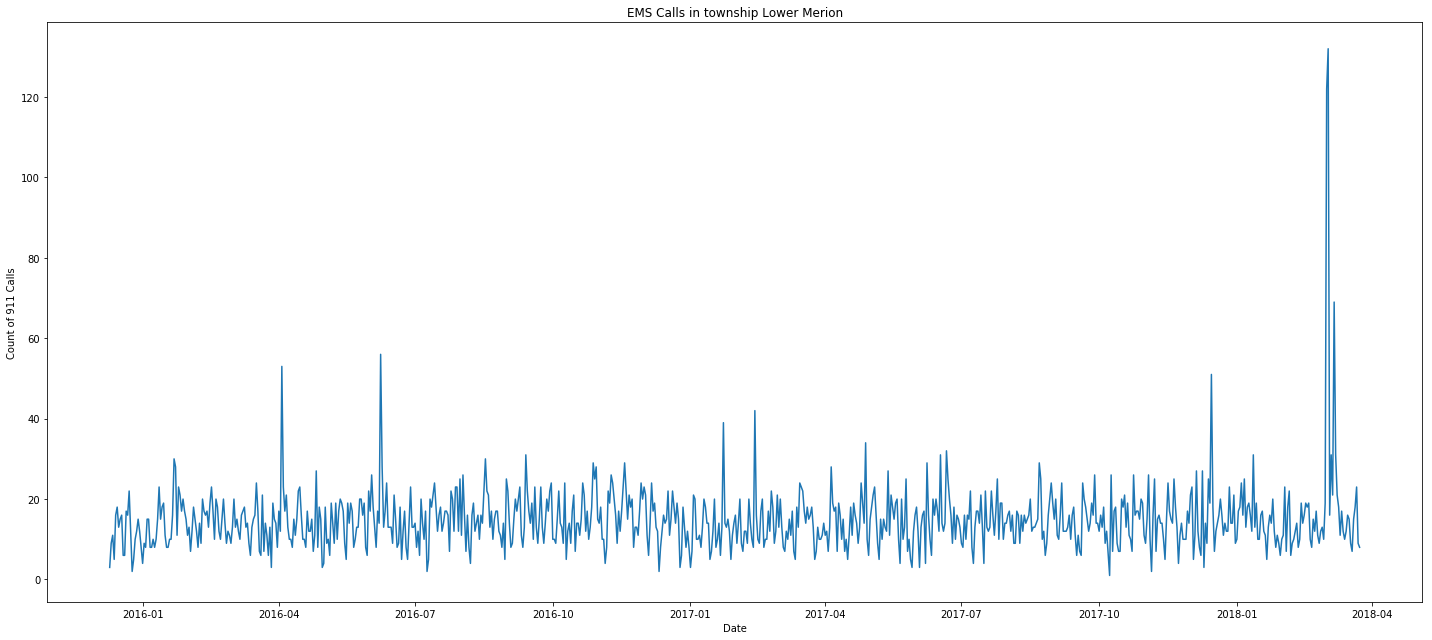

In [93]:
plt.figure(figsize=(20,9))
df4['LOWER MERION'].plot()
plt.title('EMS Calls in township Lower Merion')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

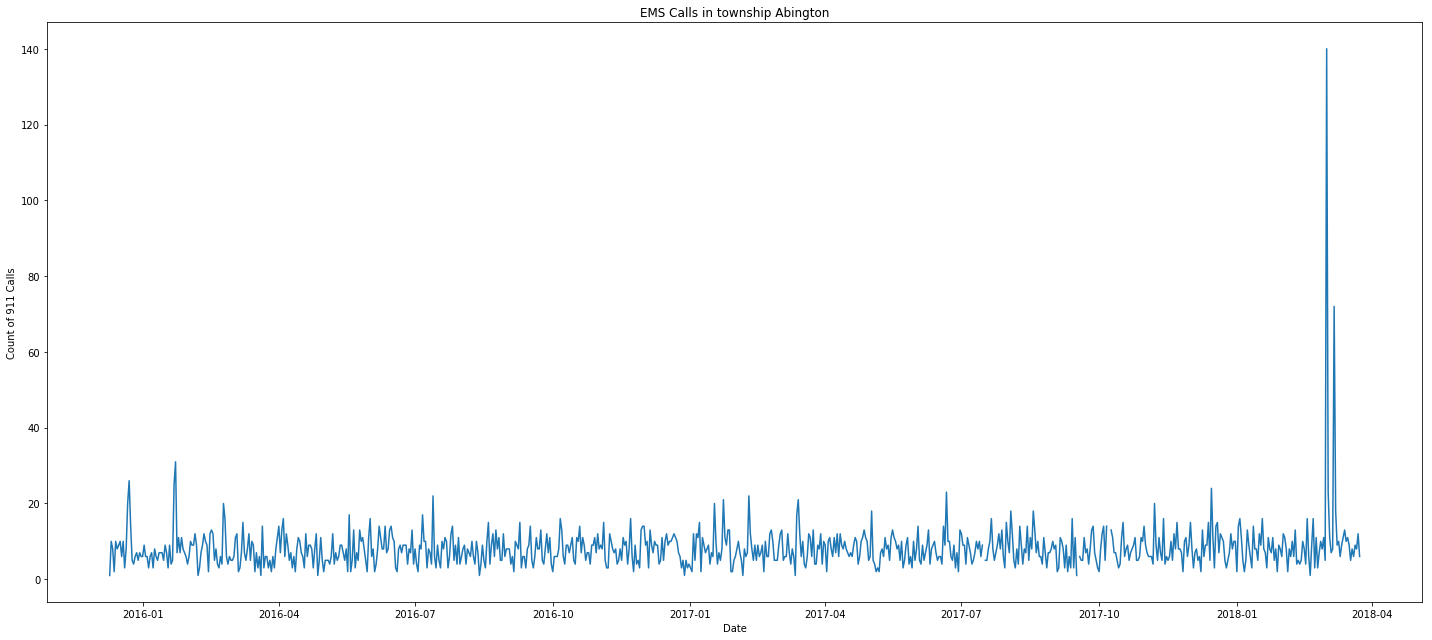

In [94]:
plt.figure(figsize=(20,9))
df4['ABINGTON'].plot()
plt.title('EMS Calls in township Abington')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

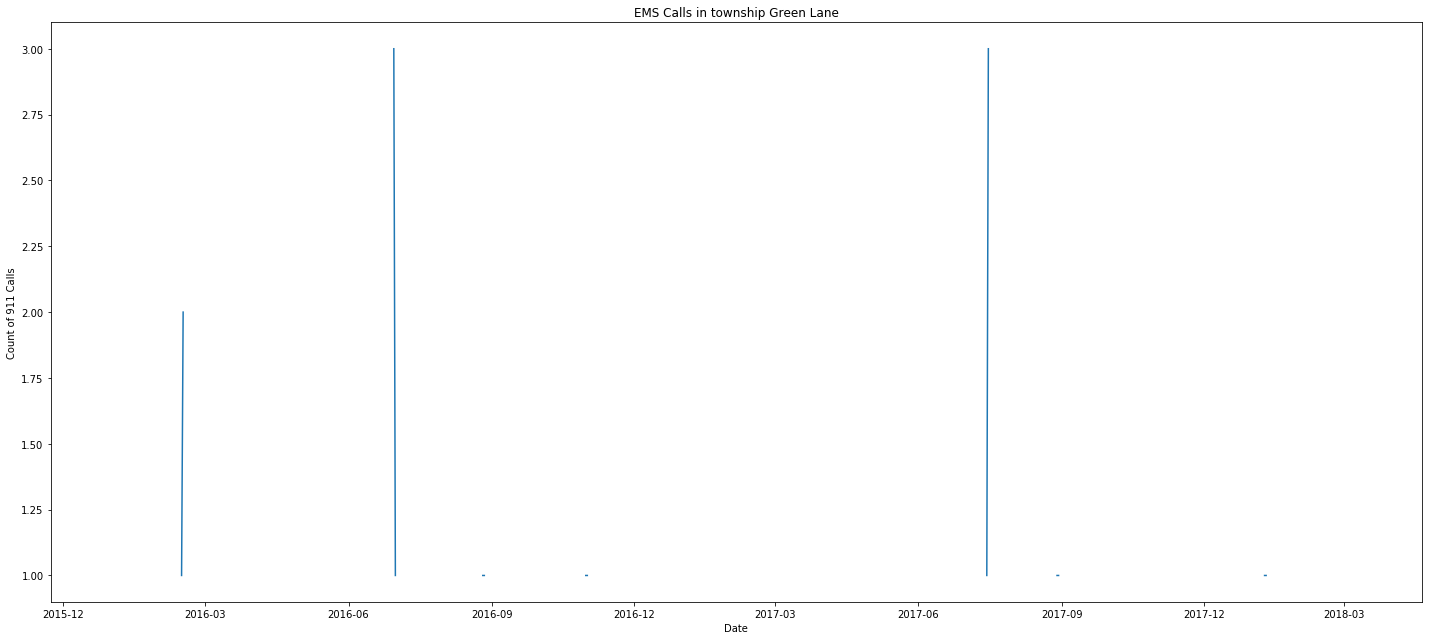

In [95]:
plt.figure(figsize=(20,9))
df4['GREEN LANE'].plot()
plt.title('EMS Calls in township Green Lane')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

** Each plot representing the amount of the 911 calls with Reason Traffic done in time in particular townships **

In [96]:
df5 = df[df['Reason']=='Traffic'].groupby(by=['Date','twp']).count()['Reason'].unstack()

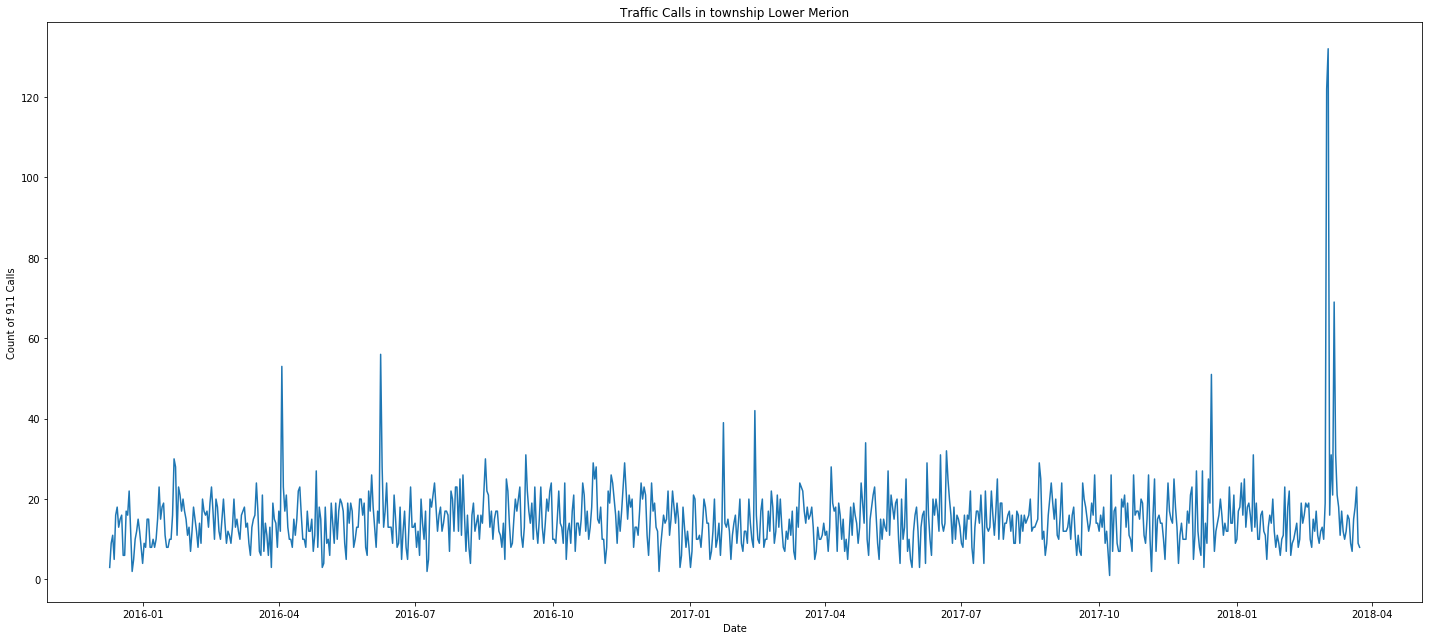

In [97]:
plt.figure(figsize=(20,9))
df5['LOWER MERION'].plot()
plt.title('Traffic Calls in township Lower Merion')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

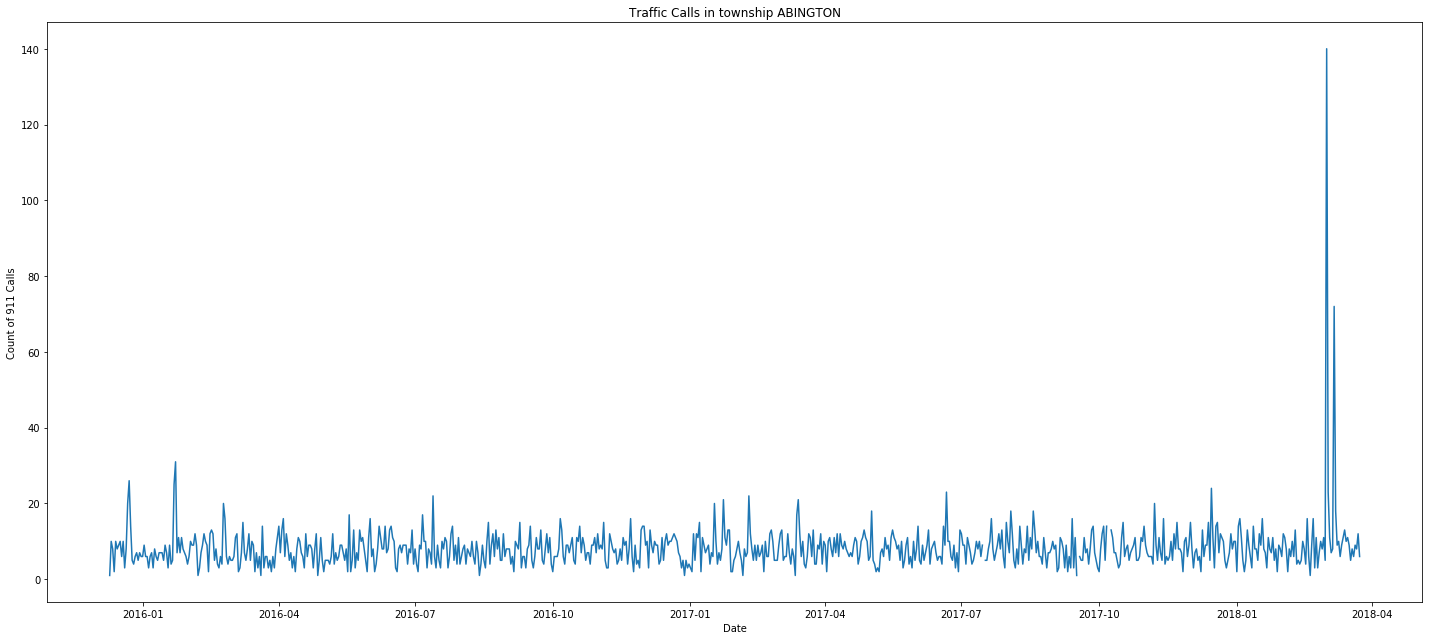

In [98]:
plt.figure(figsize=(20,9))
df5['ABINGTON'].plot()
plt.title('Traffic Calls in township ABINGTON')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

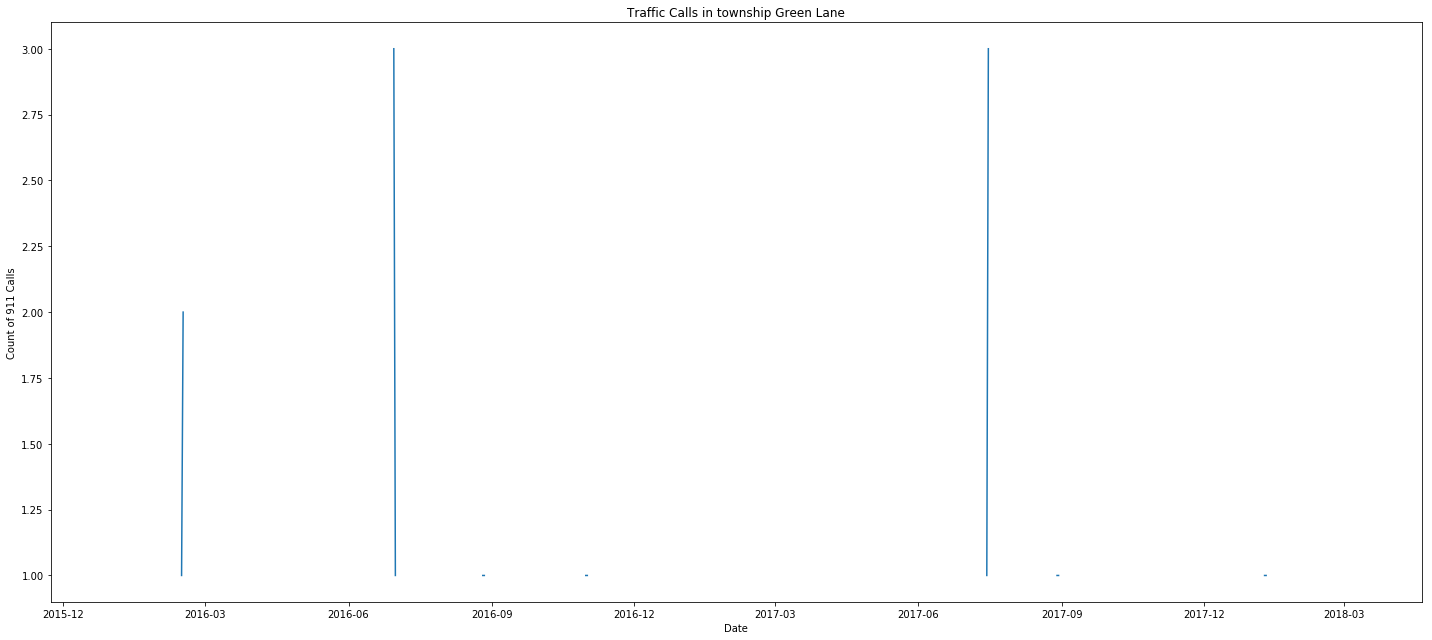

In [99]:
plt.figure(figsize=(20,9))
df5['GREEN LANE'].plot()
plt.title('Traffic Calls in township Green Lane')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

In [100]:
df6 = df[df['Reason']=='Fire'].groupby(by=['Date','twp']).count()['Reason'].unstack()

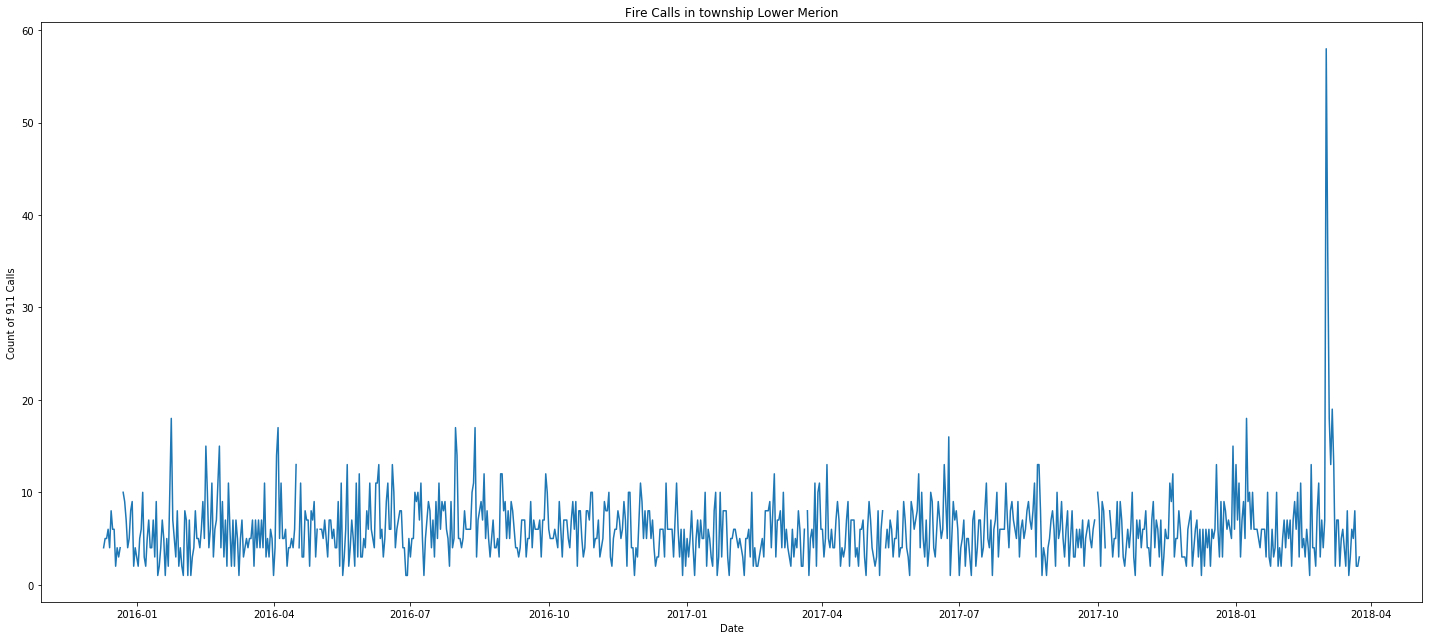

In [104]:
plt.figure(figsize=(20,9))
df6['LOWER MERION'].plot()
plt.title('Fire Calls in township Lower Merion')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

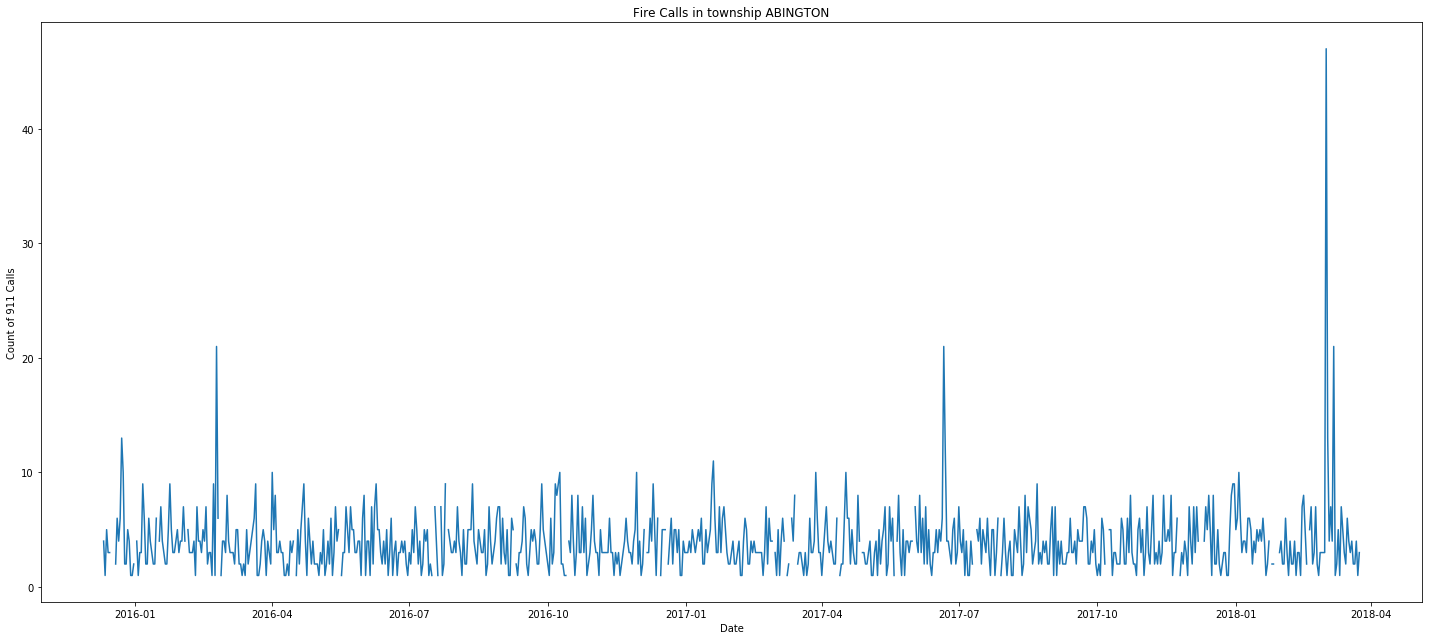

In [105]:
plt.figure(figsize=(20,9))
df6['ABINGTON'].plot()
plt.title('Fire Calls in township ABINGTON')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

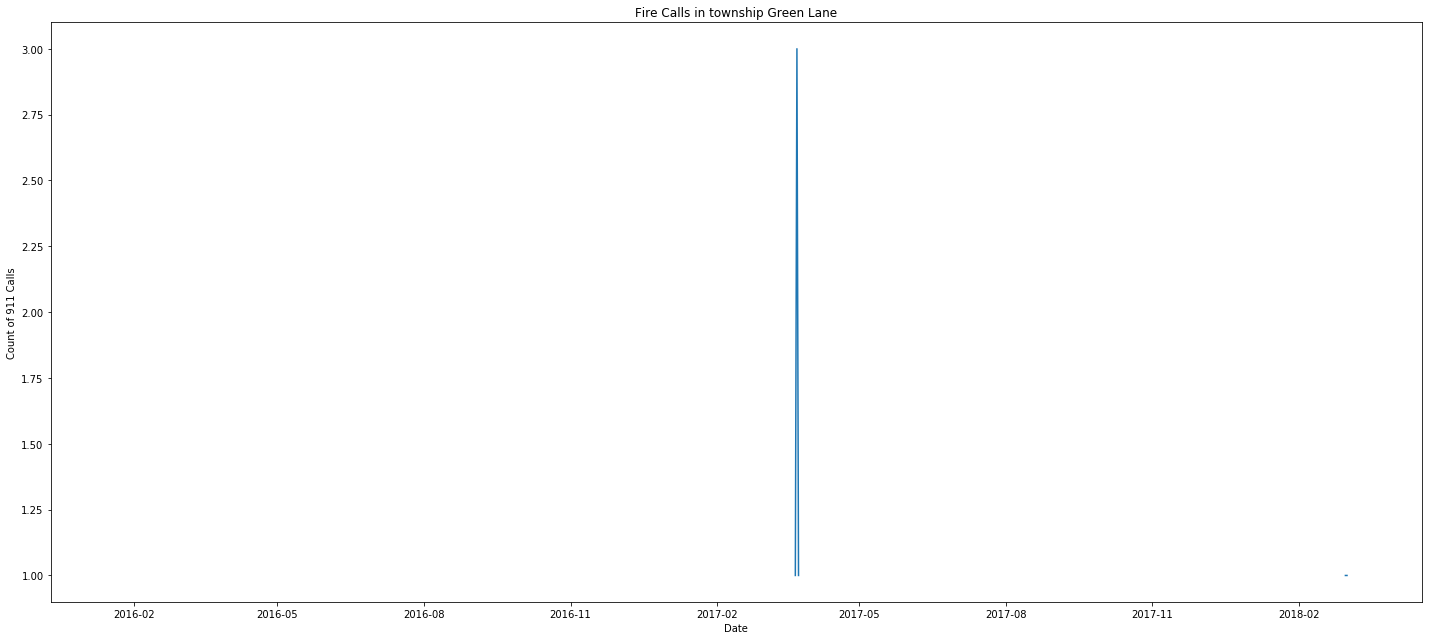

In [107]:
plt.figure(figsize=(20,9))
df6['GREEN LANE'].plot()
plt.title('Fire Calls in township Green Lane')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()